In [164]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pathlib

In [165]:
dataset_gta = pathlib.Path('/home/abanihirwe/datasets/gta/images/')
dataset_city = pathlib.Path('/home/abanihirwe/datasets/city_real/')

In [166]:
import torch
from torchvision import datasets
from torchvision import transforms

In [167]:
transfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(
        #mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [168]:
class DomainDataset(Dataset):
    """Domain A dataset """
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.files = os.listdir(root_dir)
        
    def __len__(self):
        return len(os.listdir(self.root_dir))
    
    def __getitem__(self, idx):
        img_name = self.root_dir/self.files[idx]
        image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)
            
        return image

In [169]:
DomainA = DomainDataset(dataset_gta, transfms)
DomainB = DomainDataset(dataset_city, transfms)

In [170]:
len(DomainA), len(DomainB)

(2466, 2139)

In [176]:
for i in range(len(DomainA)):
    sample = DomainA[i]
    print(i, sample.size())
    
    if i == 3:
        break

0 torch.Size([3, 224, 224])
1 torch.Size([3, 224, 224])
2 torch.Size([3, 224, 224])
3 torch.Size([3, 224, 224])


In [177]:
dataloader_gta = DataLoader(DomainA, batch_size=4, shuffle=True, num_workers=4)
dataloader_city = DataLoader(DomainB, batch_size=4, shuffle=True, num_workers=4)

In [178]:
def show_batch(sample_batched):
    images_batch = sample_batched
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

0 torch.Size([4, 3, 224, 224])
1 torch.Size([4, 3, 224, 224])
2 torch.Size([4, 3, 224, 224])
3 torch.Size([4, 3, 224, 224])


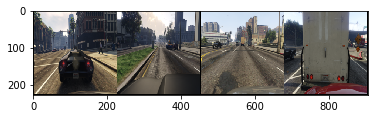

In [179]:
for i_batch, sample_batched in enumerate(dataloader_gta):
    print(i_batch, sample_batched.size())
    
    if i_batch == 3:
        show_batch(sample_batched)
        break

0 torch.Size([4, 3, 224, 224])
1 torch.Size([4, 3, 224, 224])
2 torch.Size([4, 3, 224, 224])
3 torch.Size([4, 3, 224, 224])


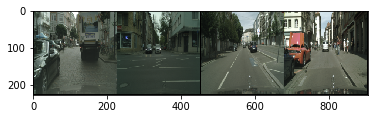

In [180]:
for i_batch, sample_batched in enumerate(dataloader_city):
    print(i_batch, sample_batched.size())
    
    if i_batch == 3:
        show_batch(sample_batched)
        break